In [1]:
import pandas as pd
import json
import os
import numpy as np
import time
import ipywidgets as widgets
from bqplot import *
import qgrid

pd.options.display.max_columns = 999

# pip install scikit-learn==1.4.0
# pip install threadpoolctl==3.1.0

import matplotlib.pyplot as plt
from matplotlib.patches import Arc

from mplsoccer import Pitch, VerticalPitch, add_image, FontManager
import seaborn as sns
from matplotlib import rcParams
import math
from PIL import Image

from highlight_text import ax_text
from matplotlib import animation
hfont = {'fontname':'Georgia'}

from scipy import optimize as op
from scipy.spatial import ConvexHull

from collections import Counter
from sklearn.decomposition import NMF
from sklearn.cluster import AgglomerativeClustering


from itertools import chain
import seaborn as sn
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import itertools


C:\Users\mishr\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [44]:
dtype = pd.read_csv('data/dtype.csv')

In [3]:
# load as lists

with open('data/all_games_active_playerid.json', 'r') as json_file:
    all_games = json.load(json_file)

In [4]:
def euclidean_distance(point1, point2):

    """
    euclidean_distance(point1, point2)
    
    Finds the euclidean distance between 2 given points with x,y coordinates

    Parameters
    -----------
    
    point1/point2 (np array): x, y coordinates
     
    Returns
    -----------
    
    distance (float): euclidean distance between the 2 given points

    """  

    return np.linalg.norm(point1 - point2)

def euclidean_similarity(array1, array2):

    """
    euclidean_distance(point1, point2)
    
    Finds the closest points between the points in two different sets, using the linear sum assignment problem.
    for more info. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html

    Parameters
    -----------
    
    array1/array1 (np array):
     
    Returns
    -----------
    
    sum_dist (float): the total cost of the assignment 
    sol_rows (list): An array of row indices indices giving the optimal assignment. 
    sol_cols (list): An array of corresponding column indices giving the optimal assignment

    """  

    num_points1 = array1.shape[0]
    num_points2 = array2.shape[0]
    
    cost_matrix = np.zeros((num_points1, num_points2))
    
    for i in range(num_points1):
        for j in range(num_points2):
            cost_matrix[i, j] = euclidean_distance(array1[i], array2[j])
    

    # Perform linear sum assignment and get mean squared distance
    sol_rows, sol_cols = op.linear_sum_assignment(cost_matrix)
    sum_dist = cost_matrix[sol_rows, sol_cols].sum()
    # updated_cost_matrix = cost_matrix[sol_rows, sol_cols]


    return sum_dist, sol_rows, sol_cols



def active_players(x_coor, y_coor, attack_bool):
    
    if not attack_bool:
        distances = np.sqrt((x_coor - 105)**2 + (y_coor - 34)**2)

        # Find the index of the coordinates with the least distance
        min_distance_index = np.argmin(distances)
        
        x_coor = np.delete(x_coor, min_distance_index)
        y_coor = np.delete(y_coor, min_distance_index)

    # Remove coordinates that do not meet the conditions
    condition = (x_coor > 88) & (y_coor > 14) & (y_coor < 54)
    x_coor = x_coor[condition]
    y_coor = y_coor[condition]
    

    return x_coor, y_coor

To visualize player position of players during corner situation

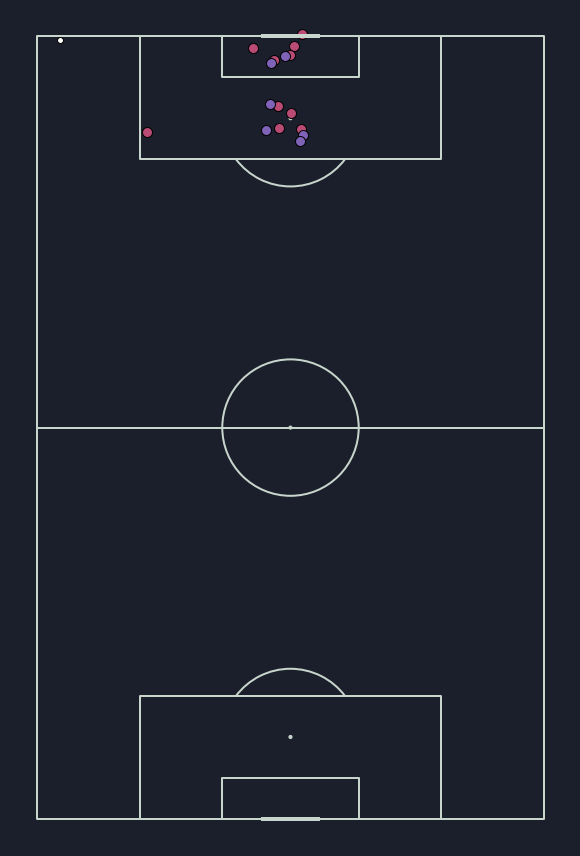

In [5]:
file_name = '4.json'
corner_num = '5'

# 1 -> all zonal
frame_for_lsp = 0

pitch = VerticalPitch(pitch_color='#1b1f2b',pitch_type='custom',
            pitch_length=105, pitch_width=68,figsize=(14, 12), line_zorder=2, line_color='#c7d5cc')

fig, ax = pitch.draw(figsize=(14, 12))
fig.set_facecolor('#1b1f2b')


# then setup the pitch plot markers we want to animate
marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
ball, = ax.plot([], [], ms=6, markerfacecolor='w', zorder=3, **marker_kwargs)
away, = ax.plot([], [], ms=10, markerfacecolor='#b94b75', **marker_kwargs)  # red/maroon
home, = ax.plot([], [], ms=10, markerfacecolor='#7f63b8', **marker_kwargs)  # purple


# animation function
def animate(i):
    
#     i = 70
    """ Function to animate the data. Each frame it sets the data for the players and the ball."""
    # set the ball data with the x and y positions for the ith frame
    ball.set_data(np.array(all_games[file_name][corner_num]['ball_coors'][i])[:, 1], np.array(all_games[file_name][corner_num]['ball_coors'][i])[:, 0])
    
    # get the frame id for the ith frame

    # set the player data using the frame id
    away.set_data(np.array(all_games[file_name][corner_num]['defending_coors'][i])[:, 1].astype(float), np.array(all_games[file_name][corner_num]['defending_coors'][i])[:, 0].astype(float))
    home.set_data(np.array(all_games[file_name][corner_num]['attacking_coors'][i])[:, 1].astype(float), np.array(all_games[file_name][corner_num]['attacking_coors'][i])[:, 0].astype(float))
    
    return ball, away, home

#  #stacking all the (x,y) points to change shape from 1D array to 2D array.
# attack_coord = np.column_stack((team_x_x_dc[i], team_x_y_dc[i]))
# defence_coord = np.column_stack((opp_all_x_dc[i], opp_all_y_dc[i]))

# #linear assignment problem       
# cost, sol_rows, sol_cols = euclidean_similarity(attack_coord, defence_coord)


# #overlaps best assignments
# # {

                
# call the animator, animate so 25 frames per second
anim = animation.FuncAnimation(fig, animate, frames=len(all_games[file_name][corner_num]['ball_coors']), interval=200, blit=True)
# writergif = animation.PillowWriter(fps=30)
# anim.save('79json_3_straight.gif',writer=writergif)

# pitch.scatter(88, 14, marker = 'x',ax=ax,zorder=3,s=100, color = "yellow")

# pitch.scatter(88, 55, marker = 'x',ax=ax,zorder=3,s=100, color = "yellow")


# defence_coord = np.column_stack(active_players(np.array(all_games[file_name][corner_num]['defending_coors'])[frame_for_lsp][:, 0], np.array(all_games[file_name][corner_num]['defending_coors'])[frame_for_lsp][:, 1], False))
# attack_coord = np.column_stack(active_players(np.array(all_games[file_name][corner_num]['attacking_coors'])[frame_for_lsp][:, 0], np.array(all_games[file_name][corner_num]['attacking_coors'])[frame_for_lsp][:, 1], True))

# cost, sol_rows, sol_cols = euclidean_similarity(attack_coord, defence_coord)


# for rows in range(len(sol_rows)):
#     pitch.plot((attack_coord[sol_rows[rows]][0],defence_coord[sol_cols][rows][0]),(attack_coord[sol_rows[rows]][1],defence_coord[sol_cols][rows][1]),color='yellow', linewidth=2, ax=ax)

# ax.text(s = all_games[file_name][corner_num]['d_type'], y = 55, x = 41, color = 'white', size = 20)

# plt.savefig('Hybrid_49json_0',dpi=480,bbox_inches='tight',facecolor='#1b1f2b')
plt.show()



Attacking Player position

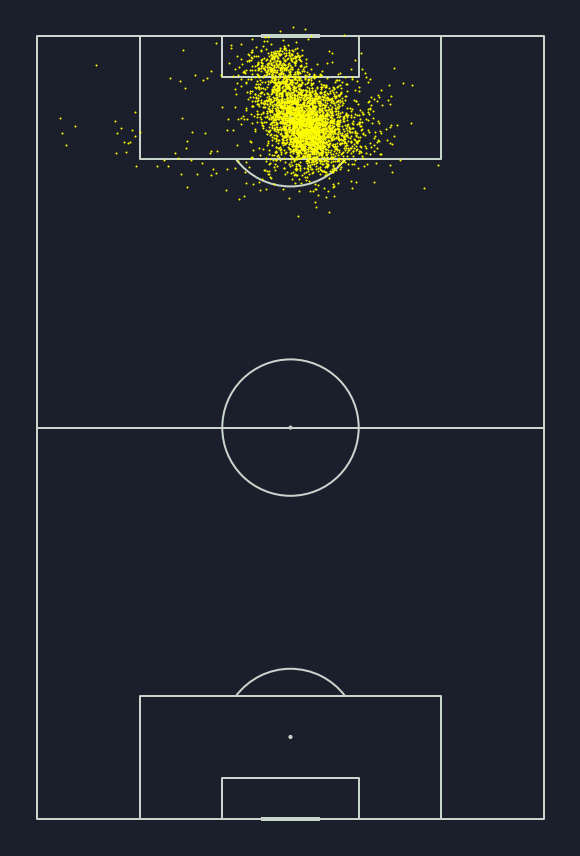

In [6]:
start_xy = []
file_names = []
corner_id_list_start = []
player_location_list_start = []
player_id_start = []


pitch = VerticalPitch(pitch_color='#1b1f2b',pitch_type='custom',
            pitch_length=105, pitch_width=68,figsize=(14, 12), line_zorder=2, line_color='#c7d5cc')

fig, ax = pitch.draw(figsize=(14, 12))
fig.set_facecolor('#1b1f2b')

starting_coor = 0

for file_name in all_games.keys():
    
    for corner_num in all_games[file_name].keys():
        
        file_names.append(file_name + "_" + corner_num)
        
        try:
            x, y = np.array(all_games[file_name][corner_num]['attacking_coors'])[starting_coor][:, :2].T.astype(float)
        
        except TypeError as ve:

            x, y = np.array([sublist for sublist in all_games[file_name][corner_num]['attacking_coors'] if sublist])[starting_coor][:, :2].T.astype(float)
        try:
            pids = np.array(all_games[file_name][corner_num]['attacking_coors'])[starting_coor][:,6 :7].T.astype('str')
         
        except TypeError as ve:
            
            pids = np.array([sublist for sublist in all_games[file_name][corner_num]['attacking_coors'] if sublist])[starting_coor][:,6 :7].T.astype('str')
            

        start_xy.append((x,y))
        pitch.scatter(x,y, marker = 'o',ax=ax,zorder=3,s=1, color = "yellow")

                
        for idx in range(len(x)):
            player_location_list_start.append((x[idx], y[idx]))
            corner_id_list_start.append(str(file_name) + "_" + str(corner_num))
            player_id_start.append(pids[0][idx])
                    

plt.show()



"Active Attacker" position

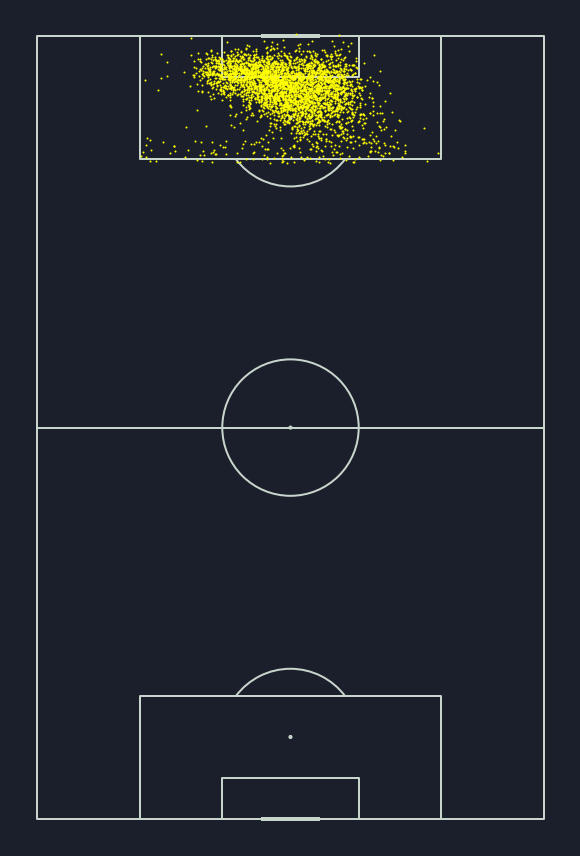

In [7]:
end_xy = []
corner_id_list_end = []
player_location_list_end = []
player_id_end = []


pitch = VerticalPitch(pitch_color='#1b1f2b',pitch_type='custom',
            pitch_length=105, pitch_width=68,figsize=(14, 12), line_zorder=2, line_color='#c7d5cc')

fig, ax = pitch.draw(figsize=(14, 12))
fig.set_facecolor('#1b1f2b')

ending_coor = -1


for file_name in all_games.keys():
    
    for corner_num in all_games[file_name].keys():
        
        try:
           x, y = np.array(all_games[file_name][corner_num]['attacking_coors'])[ending_coor][:, :2].T.astype(float)
        
        except TypeError as ve:
            
            x, y = np.array([sublist for sublist in all_games[file_name][corner_num]['attacking_coors'] if sublist])[ending_coor][:, :2].T.astype(float)
        try:
            pids = np.array(all_games[file_name][corner_num]['attacking_coors'])[ending_coor][:,6 :7].T.astype('str')
         
        except TypeError as ve:
            
            pids = np.array([sublist for sublist in all_games[file_name][corner_num]['attacking_coors'] if sublist])[ending_coor][:,6 :7].T.astype('str')
            

        end_xy.append((x,y))
        pitch.scatter(x,y, marker = 'o',ax=ax,zorder=3,s=1, color = "yellow")

                
        for idx in range(len(x)):
            player_location_list_end.append((x[idx], y[idx]))
            corner_id_list_end.append(str(file_name) + "_" + str(corner_num))
            player_id_end.append(pids[0][idx])

# plt.savefig('Hybrid_49json_0',dpi=480,bbox_inches='tight',facecolor='#1b1f2b')
plt.show()



In [9]:
start_coordinates = np.transpose(np.column_stack(start_xy))
         
end_coordinates = np.transpose(np.column_stack(end_xy))
        

In [10]:
start_coordinates.shape

(3528, 2)

In [11]:
end_coordinates.shape

(3528, 2)

In [12]:
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap


def plot_gmm(gmm, X, label=True, ax=None, start = False):
    def draw_ellipse(position, covariance, ax=None, **kwargs):
#         ax = ax or plt.gca()
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width, height = 2 * np.sqrt(covariance)
            
        nsig = 1
        ax.add_patch(Ellipse(
            (position[1], position[0]), nsig * width, nsig * height,
            angle, **kwargs))
    
#     ax = ax or plt.gca()
    colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3']
    cmap = ListedColormap(colors)
    
    labels = gmm.fit(X).predict(X)
    if label:
        plt.scatter(X[:, 1], X[:, 0], c=labels, s=5, cmap=cmap, zorder=5) 
    else:
        plt.scatter(X[:, 1], X[:, 0], s=7, zorder=5)
    
    sorted_indices = np.argsort(gmm.means_[:, 1]) 

    sorted_means = gmm.means_[sorted_indices][::-1]

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w, color in zip(gmm.means_, gmm.covariances_, gmm.weights_, colors):

        draw_ellipse(pos, covar, ax=ax, alpha=0.7, color = color, zorder = 6)
        plt.scatter(pos[1],pos[0], color = '#1b1f2b', s = 200, zorder = 7, alpha = 1)
      
    if start :
        for idx, mean in enumerate(sorted_means):
            plt.text(s = str(idx + 1), y = mean[0]-0.2,x = mean[1] + 0.3,color = 'white', zorder = 8, size = 15, **hfont)
    
    else:
         for idx, mean in enumerate(sorted_means):
            plt.text(s = str(chr(ord('a') + idx)), y = mean[0]-0.2,x = mean[1] + 0.3,color = 'white', zorder = 8, size = 15, **hfont)
     
     
    return labels

# Find the optimal number of GMM clusters 

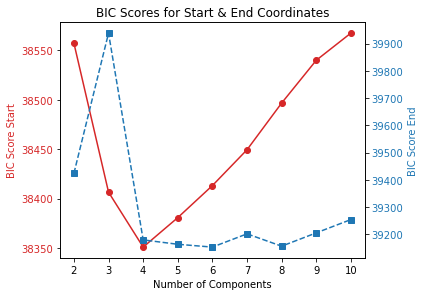

In [13]:
n_components_range = range(2, 11)
bic_scores_start = []
bic_scores_end = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(start_coordinates)
    bic_scores_start.append(gmm.bic(start_coordinates))
    
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(end_coordinates)
    bic_scores_end.append(gmm.bic(end_coordinates))

# Plot BIC scores and the gradient
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('BIC Score Start', color=color)
ax1.plot(n_components_range, bic_scores_start, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('BIC Score End', color=color)
ax2.plot(n_components_range, bic_scores_end, marker='s', linestyle='dashed', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('BIC Scores for Start & End Coordinates')
plt.show()

We opt to go with 5 clusters rather than the suggested 4, as the player locations with 5 clusters were furter divided into logical zones near the goal.

In [14]:
num_clusters_start = 5
num_clusters_end = 5

# Initial Zones

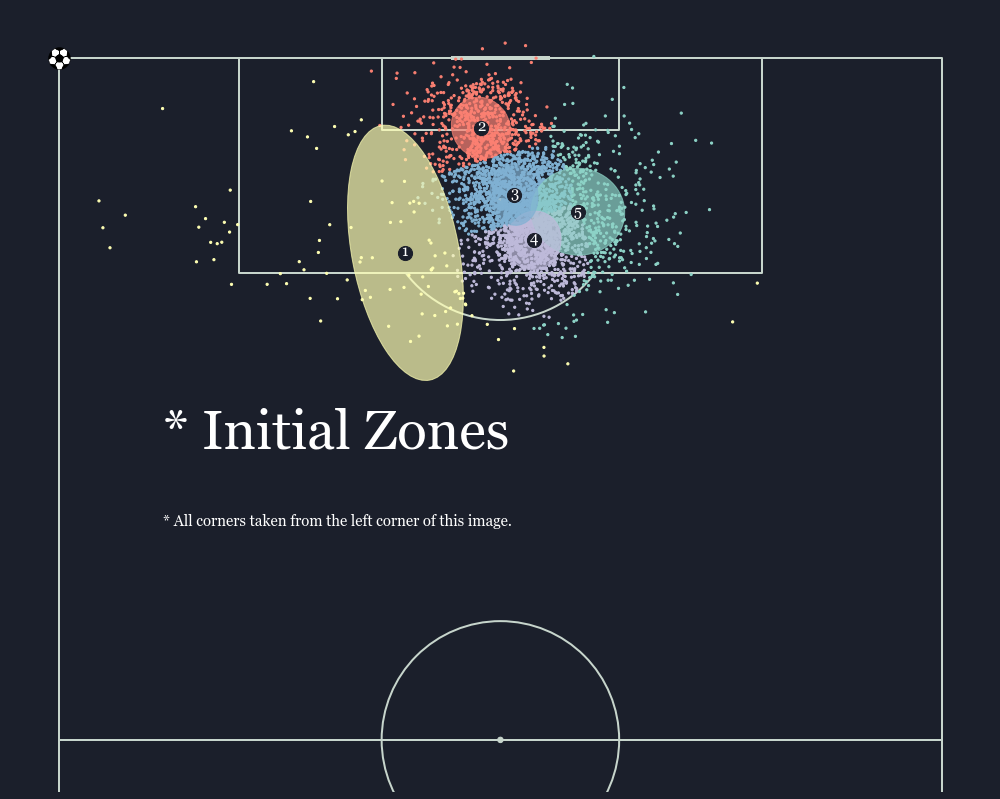

In [15]:
pitch = VerticalPitch(pitch_color='#1b1f2b',pitch_type='custom',
            pitch_length=105, pitch_width=68,figsize=(14, 12), line_zorder=2, line_color='#c7d5cc', half = True)

fig, ax = pitch.draw(figsize=(14, 12))
fig.set_facecolor('#1b1f2b')

gmm_start_coordinates = GaussianMixture(n_components=num_clusters_start, covariance_type='full', random_state=42)

start_labels = plot_gmm(gmm_start_coordinates, start_coordinates, ax=ax, start = True)
pitch.scatter(105, 68,c='white',marker="football",ax=ax,zorder=3,s=500)

plt.text(60,75,"* Initial Zones",color='white',size =55, **hfont)

plt.text(60,69,"* All corners taken from the left corner of this image.",color='white',size =15, **hfont)

# pitch.scatter(95.7618459903381, 32.541680193236715, c='white',marker="football",ax=ax,zorder=10,s=500)

# plt.savefig('figures/initial_zones',dpi=480,bbox_inches='tight',facecolor='#1b1f2b')
plt.show()


# Target Zones

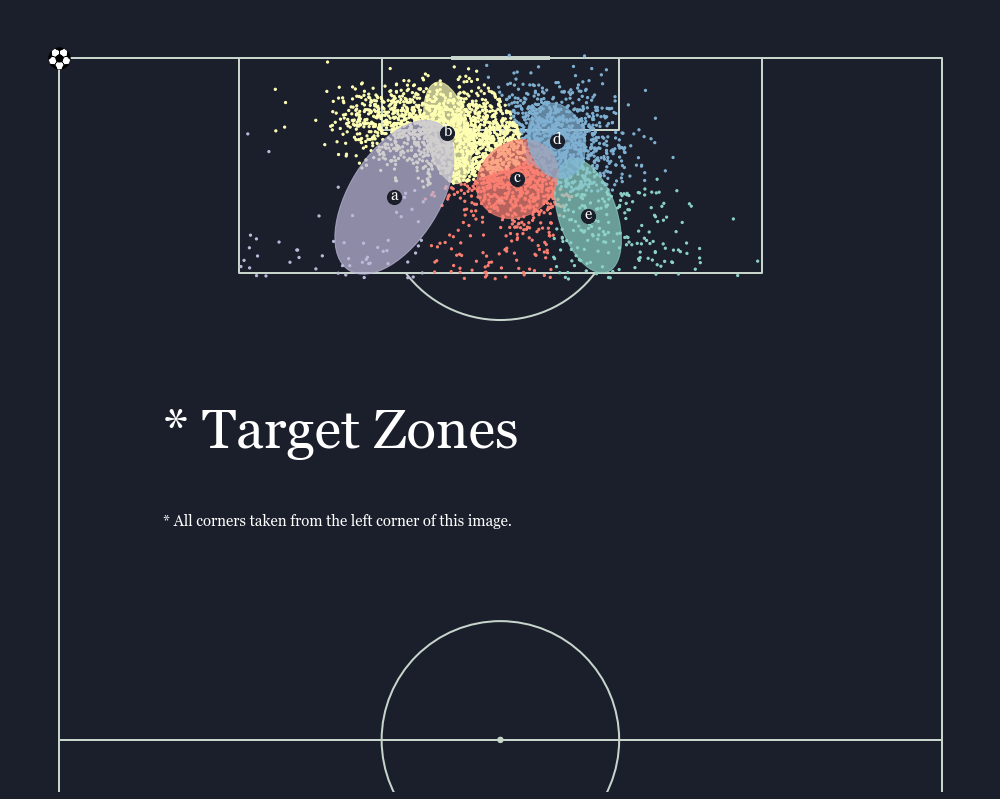

In [16]:
pitch = VerticalPitch(pitch_color='#1b1f2b',pitch_type='custom',
            pitch_length=105, pitch_width=68,figsize=(14, 12), line_zorder=2, line_color='#c7d5cc', half = True)

fig, ax = pitch.draw(figsize=(14, 12))
fig.set_facecolor('#1b1f2b')


gmm_end_coordinates = GaussianMixture(n_components=num_clusters_end, covariance_type='full', random_state=42)

end_labels = plot_gmm(gmm_end_coordinates, end_coordinates, ax=ax, start = False)
pitch.scatter(105, 68,c='white',marker="football",ax=ax,zorder=3,s=500)


plt.text(60,75,"* Target Zones",color='white',size =55, **hfont)

plt.text(60,69,"* All corners taken from the left corner of this image.",color='white',size =15, **hfont)


# plt.savefig('figures/target_zones',dpi=480,bbox_inches='tight',facecolor='#1b1f2b')
plt.show()


In [77]:
start_coord_df = pd.DataFrame(list(zip(corner_id_list_start, player_location_list_start, player_id_start)), columns=['file_names', 'start_location', 'player_id'])
end_coord_df = pd.DataFrame(list(zip(corner_id_list_end, player_location_list_end, player_id_end)), columns=['file_names', 'end_location','player_id'])

In [78]:

# # Add a new column 'unique_clusters' with arrays of unique clusters for each row
end_coord_df['cluster_proba_end'] = end_coord_df.apply(lambda row: np.round(gmm_end_coordinates.predict_proba([row.values[1]]),2), axis=1)


In [79]:

# # Add a new column 'unique_clusters' with arrays of unique clusters for each row
start_coord_df['cluster_proba_start'] = start_coord_df.apply(lambda row: np.round(gmm_start_coordinates.predict_proba([row.values[1]]),2), axis=1)


In [81]:
merged_df = pd.merge(start_coord_df, end_coord_df, on=['file_names', 'player_id'])


In [88]:
def calculate_cluster_proba_final(row):
    cluster_proba_final = []
    for proba_1 in row['cluster_proba_start']:
        for proba_2 in row['cluster_proba_end']:
            for each in proba_1:
                for each_2 in proba_2:
                    cluster_proba_final.append(each * each_2)
    return cluster_proba_final

merged_df['cluster_proba_final'] = merged_df.apply(calculate_cluster_proba_final, axis=1)


In [102]:
result_df = merged_df.groupby('file_names')['cluster_proba_final'].agg(lambda x: [np.round(sum(i),2) for i in zip(*x)]).reset_index()


In [125]:
final_feature_list = []
for idx, value in enumerate(result_df['cluster_proba_final']):
    final_feature_list.append(value)

In [128]:
X = np.array(final_feature_list)

The study [A Playbook for Corner Kicks](https://www.sloansportsconference.com/research-papers/routine-inspection-a-playbook-for-corner-kicks), used Non Negative Matrix Factorization to get the top components of the feature vectors. The code below implements their method. But we opt to use the whole vector, as we saw better performance when taking into account the whole vector.

1 31.717275924625795
2 26.947159222190937
3 22.883479577171478
4 20.777827475538068
5 18.385536890721063
6 16.561066005679656
7 14.937005311932502
8 13.248951804988792
9 11.867855978767048
10 9.999303833132188
11 9.809151054115665
12 7.981084631705707
13 7.403681572502932
14 7.183177956779343
15 6.70573872336245
16 6.015054324454746
17 5.683299526799903
18 5.99458842007124
19 5.464846100276119
20 5.27907313498378
21 4.108667742001549
22 4.669012157184851
23 3.673555203304578
24 4.194936642100828


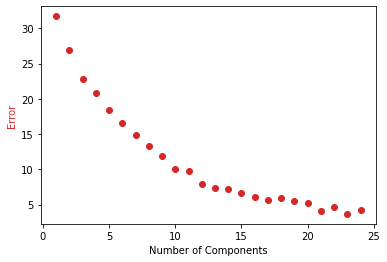

In [129]:
fig, ax = plt.subplots()

color = 'tab:red'

for i in range(1,25):
    nmf_model = NMF(n_components= i, init='random', solver='mu', beta_loss='frobenius', random_state=42, alpha_W=0.0, alpha_H='same', l1_ratio=0.0)
    W = nmf_model.fit_transform(np.transpose(X))
    H = nmf_model.components_
    
    err = np.linalg.norm(np.transpose(X) - W @ H)**2/np.linalg.norm(np.transpose(X))**2
#     print(i, err)
    print(i, nmf_model.reconstruction_err_)
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Error', color=color)
    ax.plot(i, nmf_model.reconstruction_err_, marker='o', color=color)
#     

In [130]:
nmf_model = NMF(n_components= 16, init='random', solver='mu', beta_loss='frobenius', random_state=42, alpha_W=0.0, alpha_H='same', l1_ratio=0.0)

In [131]:
W = nmf_model.fit_transform(np.transpose(X))
H = nmf_model.components_

In [132]:
X.shape

(628, 25)

In [133]:
W.shape

(25, 16)

In [134]:
H.shape

(16, 628)

In [144]:
X

array([[0.  , 0.14, 0.  , ..., 0.03, 0.2 , 0.33],
       [0.01, 0.08, 0.01, ..., 0.02, 0.09, 0.17],
       [0.  , 0.13, 0.  , ..., 0.06, 0.3 , 0.85],
       ...,
       [0.01, 0.18, 0.  , ..., 0.  , 0.09, 0.23],
       [0.02, 0.31, 0.01, ..., 0.03, 0.31, 0.09],
       [0.02, 0.09, 0.  , ..., 0.03, 0.84, 0.17]])

The study [A Playbook for Corner Kicks](https://www.sloansportsconference.com/research-papers/routine-inspection-a-playbook-for-corner-kicks) uses Agglomerative Clustering to divide the attacking setups into various categories. Although we have the code available to do that below, we found it harder to comprehend these clusters and then categorize them into clusters that made sense for human understanding. In our approach we use a KMeans cluster to do so, so that we could then use the centers of these clusters to find the start and end locations where most active attackers were found.

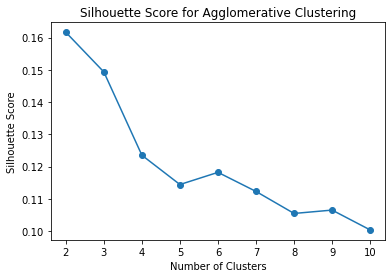

In [257]:
cluster_range = range(2, 11)  # You can adjust the range based on your requirements

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Iterate over the cluster range
for n_clusters in cluster_range:
    # Initialize Agglomerative Clustering
#     model = AgglomerativeClustering(n_clusters=n_clusters)
    model = KMeans(n_clusters=n_clusters, random_state = 42, init = 'random')
    
    
    
    # Fit and predict clusters
    labels = model.fit_predict(X)
    
    # Calculate silhouette score
    score = silhouette_score(X, labels)
    
    # Append the score to the list
    silhouette_scores.append(score)

# Plot the silhouette scores to find the optimal number of clusters
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering')
plt.show()

In [285]:
#6
# model = AgglomerativeClustering(n_clusters=4)
    
model = KMeans(n_clusters=4,  random_state = 22, init = 'k-means++')
    
labels = model.fit_predict(X)
labels

array([0, 0, 2, 1, 0, 3, 2, 0, 0, 3, 3, 3, 2, 1, 3, 0, 3, 1, 3, 0, 3, 3,
       0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 3, 2, 2, 2, 2, 2, 0,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 3, 2, 0, 0, 0, 2, 2, 3, 1,
       2, 1, 2, 3, 1, 3, 3, 3, 1, 3, 1, 2, 3, 1, 0, 1, 0, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 3, 1, 2, 1, 3, 1, 0, 1, 1, 1, 0, 0, 0, 2, 3, 2, 2,
       2, 3, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 3,
       3, 1, 2, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       1, 1, 3, 1, 0, 3, 2, 3, 0, 0, 3, 2, 2, 0, 3, 0, 1, 2, 0, 3, 1, 2,
       1, 0, 0, 2, 1, 3, 0, 0, 1, 2, 0, 2, 3, 1, 1, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 0, 2,
       2, 1, 1, 2, 3, 3, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2,
       0, 1, 3, 3, 2, 2, 1, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 0, 2, 2, 2, 2, 3, 0, 2, 1, 1, 0, 1, 3, 0, 0, 3, 3, 2, 3, 3,
       3, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1,

In [286]:
centers_cal = np.round(model.cluster_centers_,2)

In [287]:
centers_cal.shape

(4, 25)

In [288]:
centers_cal

array([[0.18, 0.2 , 0.01, 0.13, 0.35, 0.01, 0.05, 0.08, 0.05, 0.01, 0.12,
        0.45, 0.02, 0.3 , 0.29, 0.  , 0.62, 0.01, 0.06, 0.12, 0.06, 1.75,
        0.04, 0.36, 0.45],
       [0.1 , 0.26, 0.01, 0.18, 0.33, 0.01, 0.06, 0.06, 0.02, 0.01, 0.16,
        1.13, 0.04, 0.58, 0.59, 0.  , 0.25, 0.01, 0.04, 0.11, 0.03, 0.89,
        0.02, 0.24, 0.34],
       [0.14, 0.19, 0.01, 0.16, 0.45, 0.02, 0.03, 0.07, 0.03, 0.01, 0.12,
        0.39, 0.02, 0.26, 0.33, 0.01, 1.37, 0.03, 0.08, 0.17, 0.06, 0.84,
        0.02, 0.31, 0.44],
       [0.25, 0.15, 0.01, 0.24, 0.23, 0.03, 0.07, 0.11, 0.09, 0.01, 0.37,
        0.51, 0.04, 0.93, 0.38, 0.  , 0.59, 0.02, 0.07, 0.15, 0.09, 0.73,
        0.03, 0.38, 0.2 ]])

In [289]:
reshaped_matrix = centers_cal.reshape(-1, 5)

# Sum each group of 5 elements along rows
group_sums_row = np.round(np.sum(reshaped_matrix, axis=1))

In [297]:
group_sums_row.astype(int).reshape(5,4)


array([[1, 0, 1, 1],
       [3, 1, 0, 2],
       [0, 2, 1, 0],
       [1, 2, 2, 1],
       [0, 2, 1, 1]])

In [298]:
column_reshape = reshaped_matrix.reshape(4, 5, -1)
group_sums_column = np.round(np.sum(column_reshape, axis=1))

In [299]:
group_sums_column.astype(int).reshape(5,4)

array([[0, 3, 0, 1],
       [1, 0, 3, 0],
       [1, 1, 0, 3],
       [0, 1, 1, 1],
       [2, 0, 2, 1]])

#### Number of players found in each cluster based on the Start coordinates of the Active Attackers

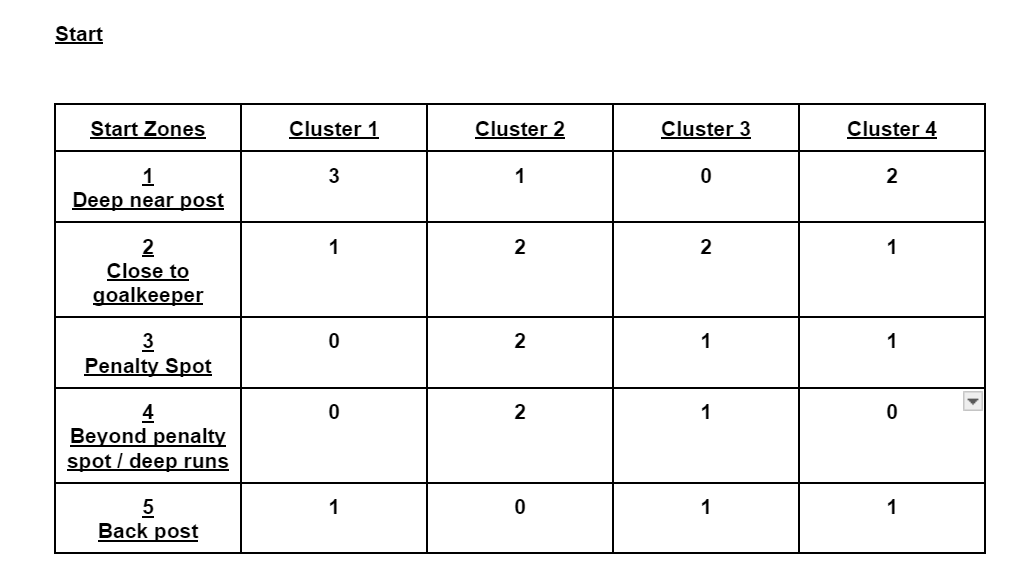

#### Number of players found in each cluster based on the End coordinates of the Active Attackers

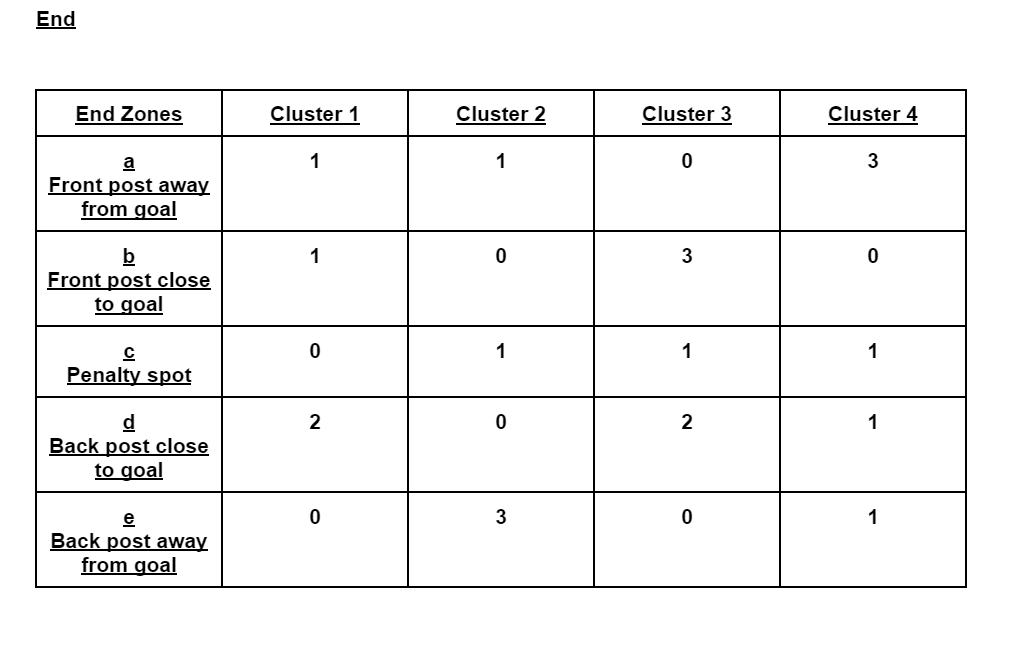

In [300]:
labels_df = pd.DataFrame(labels, columns = ['cluster'])

In [301]:
# labels_df.to_csv('data/att_clusters.csv')

In [303]:
label_counts = Counter(labels)

# Print the counts
for label, count in label_counts.items():
    print(f"Cluster {label + 1}: {count} samples")

Cluster 1: 171 samples
Cluster 3: 224 samples
Cluster 2: 123 samples
Cluster 4: 110 samples


In [304]:
for label_no in range(4):
    
    print("files for label: " + str(label_no))
    find = np.where(labels == label_no)[0]

    index_c = 0

    for file_name in all_games.keys():

        for corner_num in all_games[file_name].keys():
            if index_c in find:
                print(str(file_name.split(".")[0]) + "_" + str(corner_num))

            index_c += 1

files for label: 0
0_0
0_1
0_4
1_2
1_3
2_5
3_3
3_6
4_4
4_5
4_6
4_7
5_1
5_2
5_3
5_6
6_3
8_2
8_3
10_3
11_0
11_1
14_6
14_8
16_6
18_1
18_2
19_0
20_3
20_8
21_3
22_0
22_2
22_4
23_10
24_3
24_4
25_1
25_2
25_3
25_8
27_0
27_1
27_5
27_7
27_10
28_4
28_5
29_2
30_0
30_3
31_5
32_0
32_1
32_2
32_3
32_4
32_5
33_0
33_5
33_7
33_9
34_4
35_3
37_6
37_8
37_9
37_10
37_12
37_13
37_14
37_15
38_1
40_3
40_4
40_6
41_2
41_3
42_3
44_0
44_3
44_4
45_3
45_6
45_7
45_8
46_2
46_3
46_4
46_5
47_3
47_4
48_3
48_4
49_3
50_2
50_4
50_5
50_6
51_1
51_6
52_3
53_0
55_2
55_3
56_2
59_2
59_7
59_9
59_10
59_11
59_12
60_3
60_11
61_0
61_1
61_2
61_5
62_2
62_3
63_0
63_1
63_2
63_3
63_4
63_7
64_1
64_2
64_5
64_7
64_8
66_1
66_8
68_0
68_1
68_3
71_0
72_0
74_2
74_4
74_8
76_1
76_2
76_5
76_7
77_4
77_8
78_0
78_2
80_1
80_3
80_5
81_1
82_3
82_6
83_3
83_5
86_0
86_3
88_3
88_8
88_9
89_4
92_2
92_4
94_4
95_4
96_1
97_3
98_4
99_6
files for label: 1
0_3
2_3
3_1
5_0
5_5
11_5
11_7
13_1
14_0
14_2
14_5
14_7
14_9
15_2
15_3
15_6
15_7
15_8
16_1
16_3
16_5
16_7
16_8
18_0


In [305]:
def find_entry_index(data_array, entry):
    try:
        index = np.where(np.all(data_array == entry, axis=1))[0][0]
        return index
    except IndexError:
        return None
    

def enumerate_cluster(gmm, start):
    
    cluster_center_tuple = []
    sorted_indices = np.argsort(gmm.means_[:, 1]) 

    sorted_means = gmm.means_[sorted_indices][::-1]

    if start :
        for idx, mean in enumerate(sorted_means):

            real_index = find_entry_index(gmm.means_, mean)
            cluster_center_tuple.append((mean, real_index, idx + 1))

    else:
         for idx, mean in enumerate(sorted_means):
            real_index = find_entry_index(gmm.means_, mean)
            cluster_center_tuple.append((mean, real_index, str(chr(ord('a') + idx))))
    
    sorted_cluster_center_tuple = sorted(cluster_center_tuple, key=lambda x: x[1])
    
    return sorted_cluster_center_tuple


renamed_start = enumerate_cluster(gmm_start_coordinates, True)
renamed_end = enumerate_cluster(gmm_end_coordinates, False)

To save visualizations

KeyboardInterrupt: 

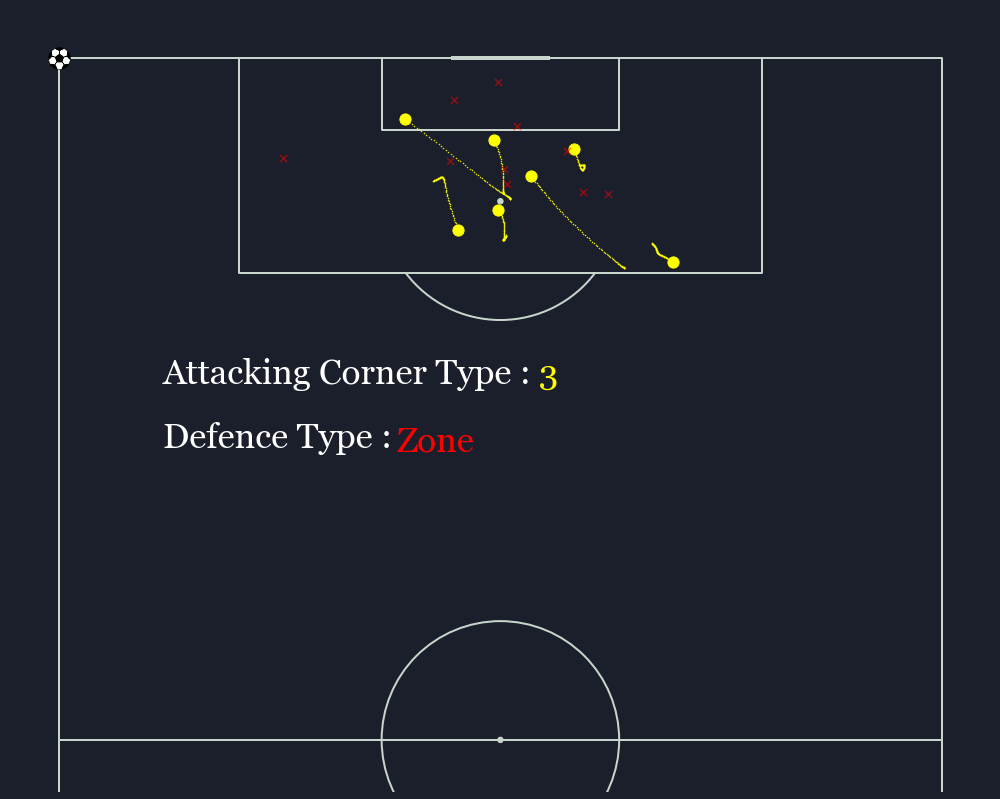

In [307]:
# # file_name = '0.json'
# # corner_num = '0'

# counter = 0

# for file_name in all_games.keys():
    
#     for corner_num in all_games[file_name].keys():
        
#         pitch = VerticalPitch(pitch_color='#1b1f2b',pitch_type='custom',
#                     pitch_length=105, pitch_width=68,figsize=(14, 12), line_zorder=2, line_color='#c7d5cc', half = True)

#         fig, ax = pitch.draw(figsize=(14, 12))
#         fig.set_facecolor('#1b1f2b')


#         new_arr = np.array([sublist for sublist in all_games[file_name][corner_num]['attacking_coors'] if sublist])
#         def_arr = np.array([sublist for sublist in all_games[file_name][corner_num]['defending_coors'] if sublist])

#         for i in range(len(new_arr)):
#             pitch.scatter(new_arr[i][:, 0].astype(float),new_arr[i][:, 1].astype(float), marker = '.',ax=ax,zorder=3,s=1, color = "yellow")
# #             pitch.scatter(def_arr[i][:, 0].astype(float),def_arr[i][:, 1].astype(float), marker = '.',ax=ax,zorder=3,s=1, color = "red")

#         pitch.scatter(new_arr[i][:, 0].astype(float),new_arr[i][:, 1].astype(float), marker = '.',ax=ax,zorder=3,s=500, color = "yellow")
#         pitch.scatter(def_arr[0][:, 0].astype(float),def_arr[0][:, 1].astype(float), marker = 'x',ax=ax,zorder=3,s=50, color = "red", alpha = 0.5)
        
        
# #         start_indexes = [np.argmax(np.array(lst)) for lst in merged_df[merged_df['file_names'] == file_name+"_"+corner_num]['cluster_proba_start']]

# #         end_indexes = [np.argmax(np.array(lst)) for lst in merged_df[merged_df['file_names'] == file_name+"_"+corner_num]['cluster_proba_end']]
        
# #         renamed_start_indexes = [renamed_start[idx][2] for idx in start_indexes]
# #         renamed_end_indexes = [renamed_end[idx][2] for idx in end_indexes]
        
        
# #         plt.text(13,88,"Run types:", color='white',size =35, **hfont)
   
# #         for each in range(len(renamed_start_indexes)):
# #              plt.text(10,85 - (3 * each),str(renamed_start_indexes[each]) + " -> " + str(renamed_end_indexes[each]), color='white',size =35, **hfont)
           
        
#         pitch.scatter(105, 68,c='white',marker="football",ax=ax,zorder=3,s=500)
        
    
#         plt.text(60,80,"Attacking Corner Type :", color='white',size =35, **hfont)
#         plt.text(31,80, str(labels[counter] + 1), color='yellow',size =35, **hfont)
#         plt.text(60,75,"Defence Type :", color='white',size =35, **hfont)
#         plt.text(42,74.75,str(dtype['gmm_all'][counter]), color='red',size =35, **hfont)
        
# #         plt.text(60,70,"Start : " + str(Counter(renamed_start_indexes)), color='white',size =35, **hfont)
# #         plt.text(60,65,"End : " + str(Counter(renamed_end_indexes)), color='white',size =35, **hfont)

        
#         #np.array(all_games[file_name][corner_num]['attacking_coors'][i])[:, 1].astype(float), np.array(all_games[file_name][corner_num]['attacking_coors'][i])[:, 0].astype(float)
#         counter +=1
            
#         plt.savefig('kmeans_4clusters/' + str(file_name.split(".")[0]) + "_" + str(corner_num),dpi=480,bbox_inches='tight',facecolor='#1b1f2b')
# #         plt.show()
# #         print(Sd)
#         plt.close()


In [308]:
labels

array([0, 0, 2, 1, 0, 3, 2, 0, 0, 3, 3, 3, 2, 1, 3, 0, 3, 1, 3, 0, 3, 3,
       0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 3, 2, 2, 2, 2, 2, 0,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 3, 2, 0, 0, 0, 2, 2, 3, 1,
       2, 1, 2, 3, 1, 3, 3, 3, 1, 3, 1, 2, 3, 1, 0, 1, 0, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 3, 1, 2, 1, 3, 1, 0, 1, 1, 1, 0, 0, 0, 2, 3, 2, 2,
       2, 3, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 3,
       3, 1, 2, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       1, 1, 3, 1, 0, 3, 2, 3, 0, 0, 3, 2, 2, 0, 3, 0, 1, 2, 0, 3, 1, 2,
       1, 0, 0, 2, 1, 3, 0, 0, 1, 2, 0, 2, 3, 1, 1, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 0, 2,
       2, 1, 1, 2, 3, 3, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2,
       0, 1, 3, 3, 2, 2, 1, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 0, 2, 2, 2, 2, 3, 0, 2, 1, 1, 0, 1, 3, 0, 0, 3, 3, 2, 3, 3,
       3, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1,

In [311]:
att_detail = []

In [312]:
for i in range(len(labels)):
    if labels[i] == 0:
        att_detail.append("Attackers start from near post")
    elif labels[i] == 1:
        att_detail.append("Runs from deeper areas - to the back post")
        
    elif labels[i] == 2:
        att_detail.append("Two way movement")
        
    else:
        att_detail.append("Near post runs")

In [309]:
features = pd.read_csv('data/features.csv')

In [314]:
features['att_setup'] = labels

In [315]:
features['att_detail'] = att_detail

In [318]:
# features.to_csv('data/features.csv')